## IMPORT NECESSARY LIBRARIES

In [17]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

## LOAD THE DATASETS

In [18]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## DISPLAY FIRST TEN ROWS IN A DATASETS.

In [19]:
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


## DISPLAY THE LAST FIVE ROWS IN THE DATASETS

In [20]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


## DISPLAY THE SIZE OF DATASETS

In [21]:
df.size

17600

## DISPLAY THE SHAPE OF THE DATA

In [22]:
df.shape

(2200, 8)

## DISPLAY THE NUMBER OF COLUMNS IN THE DATASETS

In [23]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

## DISPLAY THE UNIQUE LABEL NAME IN THE DATASETS

In [24]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## DISPLAY THE DATATYPE

In [25]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

## DISPLAY THE TOTAL COUNT VALUE IN A DATASETS

In [26]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## EXTRACT THE FEATURE "X" & TARGET VARIABLE "y".

In [33]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']
features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

## Initialzing empty lists to append all model's accuracy and corresponding name

In [34]:
acc = []
model = []

## SPLIT THE DATA INTO TRANNING AND TESTING SETS

In [35]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size = 0.2,random_state =2)

# BY USING THREE ALGORITHM TO FIND THE ACCURACY OF THIS ALGORITHM

## 1.DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [37]:
from sklearn.model_selection import cross_val_score

## Cross validation score (Decision Tree)

In [40]:
score = cross_val_score(DecisionTree, X, y,cv=5)

In [41]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

# 2.LOGISTIC REGRESSION

In [42]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

## Cross validation score (Logistic Regression)

In [44]:
score = cross_val_score(LogReg,X,y,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

# 3.RANDOM FOREST

In [45]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

## Cross validation score (Random Forest)


In [46]:
score = cross_val_score(RF,X,y,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## ACCURACY COMPARISION

In [47]:
acc

[0.9, 0.9522727272727273, 0.990909090909091]

In [48]:
model

['Decision Tree', 'Logistic Regression', 'RF']

In [49]:
for a,m in zip(acc,model):
    print(m,"\t\t\t\t=",a*100)

Decision Tree 				= 90.0
Logistic Regression 				= 95.22727272727273
RF 				= 99.0909090909091


## GRAPHICAL REPRESENTATION

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

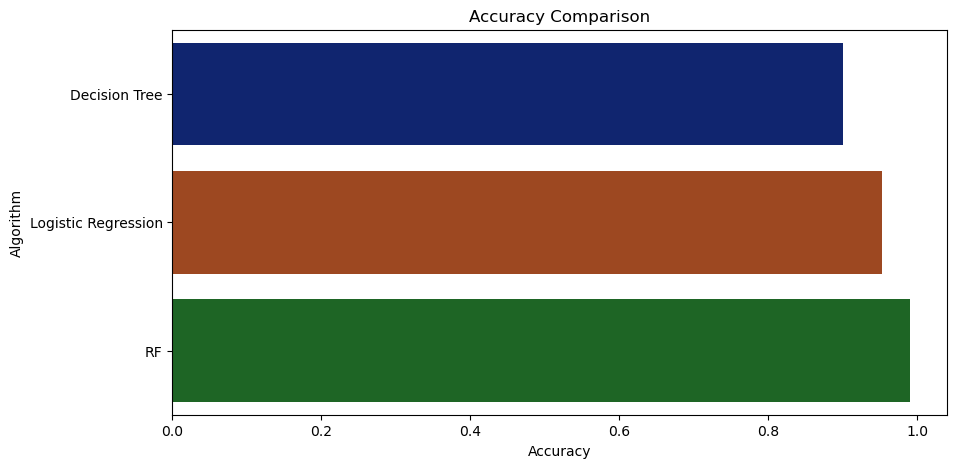

In [50]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## MAKING A PREDECTION

In [51]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [52]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']


In [53]:
data = np.array([[50, 50, 50, 28, 70.3, 7, 700]])
prediction = RF.predict(data)
print(prediction)

['papaya']


In [54]:
import requests,json


In [55]:
apiKey="a074983af18e152a0dab28a11bd59d5c"
baseURL="https://api.openweathermap.org/data/2.5/weather?q="

In [56]:
CityName=input("Enter your City:")
#Complete URL=baseURL+cityName+"&appid="+apiKey
#response=requests.get(completeURL)
#data response.json()
#print(data)

Enter your City:pune


In [70]:
import requests,json
apiKey="a074983af18e152a0dab28a11bd59d5c"
baseURL="https://api.openweathermap.org/data/2.5/weather?q="
cityName=input("Enter your City:")
completeURL=baseURL+ cityName +"&appid="+ apiKey
response=requests.get(completeURL)
data=response.json()
print(data)

print("Current Temperature",data["main"]["temp"]-273.15)
print("Current Temperature Feels like",data["main"]["feels_like"]-273.15)
print("Maximum Temperature",data["main"]["temp_max"]-273.15)
print("Maximum Temperature",data["main"]["temp_min"]-273.15)

Enter your City:pune
{'coord': {'lon': 73.8553, 'lat': 18.5196}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.24, 'feels_like': 299.08, 'temp_min': 298.24, 'temp_max': 298.24, 'pressure': 1003, 'humidity': 87, 'sea_level': 1003, 'grnd_level': 942}, 'visibility': 10000, 'wind': {'speed': 5.83, 'deg': 241, 'gust': 11.86}, 'rain': {'1h': 0.29}, 'clouds': {'all': 95}, 'dt': 1719922250, 'sys': {'country': 'IN', 'sunrise': 1719880314, 'sunset': 1719927904}, 'timezone': 19800, 'id': 1259229, 'name': 'Pune', 'cod': 200}
Current Temperature 25.090000000000032
Current Temperature Feels like 25.930000000000007
Maximum Temperature 25.090000000000032
Maximum Temperature 25.090000000000032
